CODE BLOCK: 1

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

CODE BLOCK: 2

In [2]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
device = torch.device("cuda" if cuda else "cpu")

CUDA Available? True


In [3]:
from model import *
from utils import *

CODE BLOCK: 3

In [4]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-3., 3.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])


CODE BLOCK: 4

In [5]:
train_data = datasets.CIFAR10('data', train=True, download=True, transform=train_transforms)
test_data = datasets.CIFAR10('data', train=False, download=True, transform=test_transforms)

Files already downloaded and verified
Files already downloaded and verified


CODE BLOCK: 5

In [6]:
batch_size = 64

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(train_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

CODE BLOCK: 6

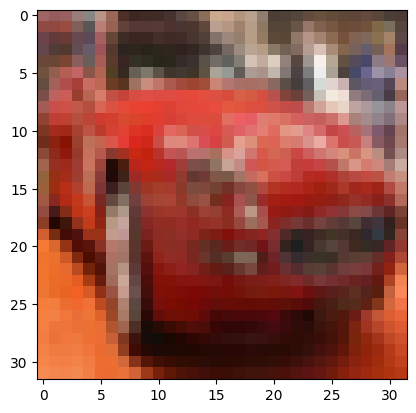

In [7]:
plt.imshow(train_data.data[5])

In [8]:
# plot_data(train_loader)

CODE BLOCK: 7

CODE BLOCK: 8

In [9]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

CODE BLOCK: 9

CODE BLOCK: 10

In [10]:
model = ResNetLikeModel()
print(model)

ResNetLikeModel(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (block1_conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (block1_bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (block1_conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (block1_bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (block1): DepthwiseSeparableBlock(
    (depthwise): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups

In [13]:
model = ResNetLikeModel().to(device)
# Create an instance of the network
# model = MyNetwork(num_classes=10).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion, train_acc, train_losses)
  test(model, device, test_loader, criterion, test_acc, test_losses)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


  0%|          | 0/782 [00:00<?, ?it/s]

Train: Loss=-85366134320136192.0000 Batch_id=781 Accuracy=14.32: 100%|██████████| 782/782 [00:42<00:00, 18.60it/s]


KeyboardInterrupt: 

CODE BLOCK: 11

In [27]:
# plot_train_test_stats(Net, train_losses, train_acc, test_acc, test_losses)

In [12]:
summary(model, input_size=(3, 32, 32), batch_size= batch_size)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [64, 32, 32, 32]             896
       BatchNorm2d-2           [64, 32, 32, 32]              64
            Conv2d-3           [64, 32, 32, 32]           9,248
       BatchNorm2d-4           [64, 32, 32, 32]              64
            Conv2d-5           [64, 64, 16, 16]          18,496
       BatchNorm2d-6           [64, 64, 16, 16]             128
            Conv2d-7           [64, 64, 16, 16]          36,928
       BatchNorm2d-8           [64, 64, 16, 16]             128
            Conv2d-9           [64, 64, 16, 16]          36,928
      BatchNorm2d-10           [64, 64, 16, 16]             128
           Conv2d-11           [64, 64, 16, 16]             640
           Conv2d-12           [64, 64, 16, 16]           4,160
      BatchNorm2d-13           [64, 64, 16, 16]             128
DepthwiseSeparableBlock-14           [6